# Decision Trees ll

The objective of this notebook is to improve our Decision Tree that we created for the titanic dataset so that it is more robust and less sensitive to variances in our dataset. We will do this by creating muliple classifiers and combine the predictions to form a single, improved prediction.

This dataset consists of data for approximately 40% of the passengers of the Titianic under various categories such as Name, Sex, Age, and Class. 

In [141]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [142]:
# importing the dataset
df = pd.read_csv('titanic.csv')

#View first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
# Check shape for no. of rows and columns
df.shape

(891, 12)

In [144]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [145]:
# View statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [146]:
# Get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in all the columns
missing_values_count[:,]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the data we can see that columns 'Age' and 'Cabin' both have missing values. A heat map of the data would clarify whereabouts the mssing data is.

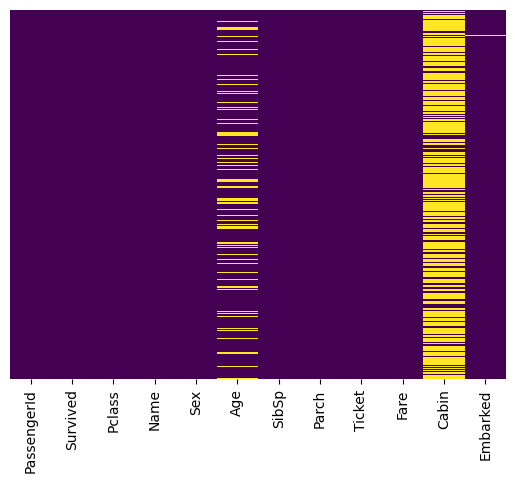

In [147]:
# Creating heatmap of missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [148]:
# counting missing values
missing_val_cnt = df.isnull().sum().sum()
missing_val_cnt

866

In [149]:
# counting total cells
tot_cells = np.product(df.shape)
tot_cells

10692

In [150]:
# Percentage of missing values
percentage_missing = round(missing_val_cnt/tot_cells * 100)
print(f'Percentage of missing values in dataset: {percentage_missing}%')

Percentage of missing values in dataset: 8%


A missing value of 8% is too high to ignore so we should try impute some values that are significant to our invetisagiton.

We can see from the heatmap that 'Cabin' has a very large number of null values, however it is irrelevant to our investigation, hence it would be pertinent to drop the column.

In [151]:
# Dropping column 'Cabin'
df.drop('Cabin', axis=1, inplace=True)

# Viewing dataset to ensure column has been dropped
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Though the columns 'Ticket', 'PassengerId' and 'Name' do not have any missing values they are not significant to our investigation regarding factors affecting survival thus we will also drop these.

In [152]:
# Dropping columns Ticket', PassengerId' and 'Name'
df.drop(['Ticket', 'PassengerId', 'Name'], axis=1, inplace=True)

# Viewing dataset to ensure columns have been dropped
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


There are a moderate number of values missing from 'Age'. The best method to impute these values would be to use the mean. 

In [153]:
# View Age statistics
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [154]:
# Impute values
mean_age = df.Age.mean()
df.Age = df.Age.replace(np.nan, mean_age)
df.Age.unique()


array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

As there are only two values missing from 'Embarked' and these are Categorial we can drop these two rows from the dataset without affecting the investigation.

In [155]:
# viewing rows for remaining missing values
df[df.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [156]:
# Drop specific rows
df = df.drop([61, 829])

# Get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in all the columns
missing_values_count[:,]

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Classifying Data

### Classifying Gender

In [157]:
# Classifying 'female'
df.Sex = df.Sex.replace('female', 0)

In [158]:
# Classifying 'male'
df.Sex = df.Sex.replace('male', 1)

In [159]:
# Formatting type
df.Sex = df.Sex.astype('category')

In [160]:
# View change
df.Sex.unique()

[1, 0]
Categories (2, int64): [0, 1]

In [161]:
df.Sex.value_counts()

1    577
0    312
Name: Sex, dtype: int64

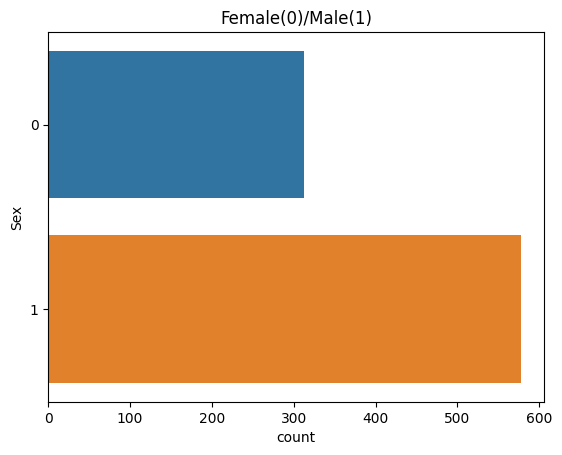

In [162]:
# Plot bar chart to visualise
sns.countplot(y='Sex', data=df);
plt.title('Female(0)/Male(1)')
plt.show()

### Classifying Embarked

In [163]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [164]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [165]:
df.Embarked = df.Embarked.replace('S', 0)

In [166]:
df.Embarked = df.Embarked.replace('C', 1)

In [167]:
df.Embarked = df.Embarked.replace('Q', 2)

In [168]:
df.Embarked = df.Embarked.astype('category')

In [169]:
df.Embarked.unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [170]:
df.Embarked.value_counts()

0    644
1    168
2     77
Name: Embarked, dtype: int64

In [171]:
# View datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(2), float64(2), int64(4)
memory usage: 50.6 KB


In [172]:
# Format data type to int
df['Age'] = df['Age'].apply(np.int64)
df['Fare'] = df['Fare'].apply(np.int64)
df.info()
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    category
 3   Age       889 non-null    int64   
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    int64   
 7   Embarked  889 non-null    category
dtypes: category(2), int64(6)
memory usage: 50.6 KB


## Machine Learning

Defining Independent (X) and dependent (y) variables

In [173]:
# Independent variable
X = df.iloc[:,[1,2,3,4,5,6,7]]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7,0
1,1,0,38,1,0,71,1
2,3,0,26,0,0,7,0
3,1,0,35,1,0,53,0
4,3,1,35,0,0,8,0


In [174]:
# Dependent variable
y = df.iloc[:,0]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [175]:
print(f'shape of independent variable: {X.shape}')
print(f'shape of dependent variable: {y.shape}')

shape of independent variable: (889, 7)
shape of dependent variable: (889,)


### Training and Test Samples

Using a ratio of 60/20/20 for training, development and test size respectively,  we inititially split our data of 889 items into a training set of 711 observations and 7 columns and a test set of 178 observations.

We then split the training set using a 0.25 ratio so that we have a training set of 568 observations and 7 columns and a development set of 143 observations.

We can use the sets to train and evaluate our model to counteract potential 'overfitting' or 'underfitting' issues.

In [176]:
# assign random state
r = 7

# split into training and test set
X_train, X_test, y_train, y_test, = train_test_split(X, 
                y, test_size=0.2, random_state=0)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)


Training data: (711, 7) (711,)
Test data: (178, 7) (178,)


In [177]:
# split into training and development set
X_train, X_dev, y_train, y_dev, = train_test_split(X_train, 
                y_train, test_size=0.2, random_state=0)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_dev.shape, y_dev.shape)

Training data: (568, 7) (568,)
Test data: (143, 7) (143,)


### Decision Tree Classifier

In [178]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)

# Accuracy on dev set
print("Accuracy without pruning:", unpruned.score(X_dev, y_dev))
print("At depth:", unpruned.tree_.max_depth)



Accuracy without pruning: 0.7902097902097902
At depth: 17


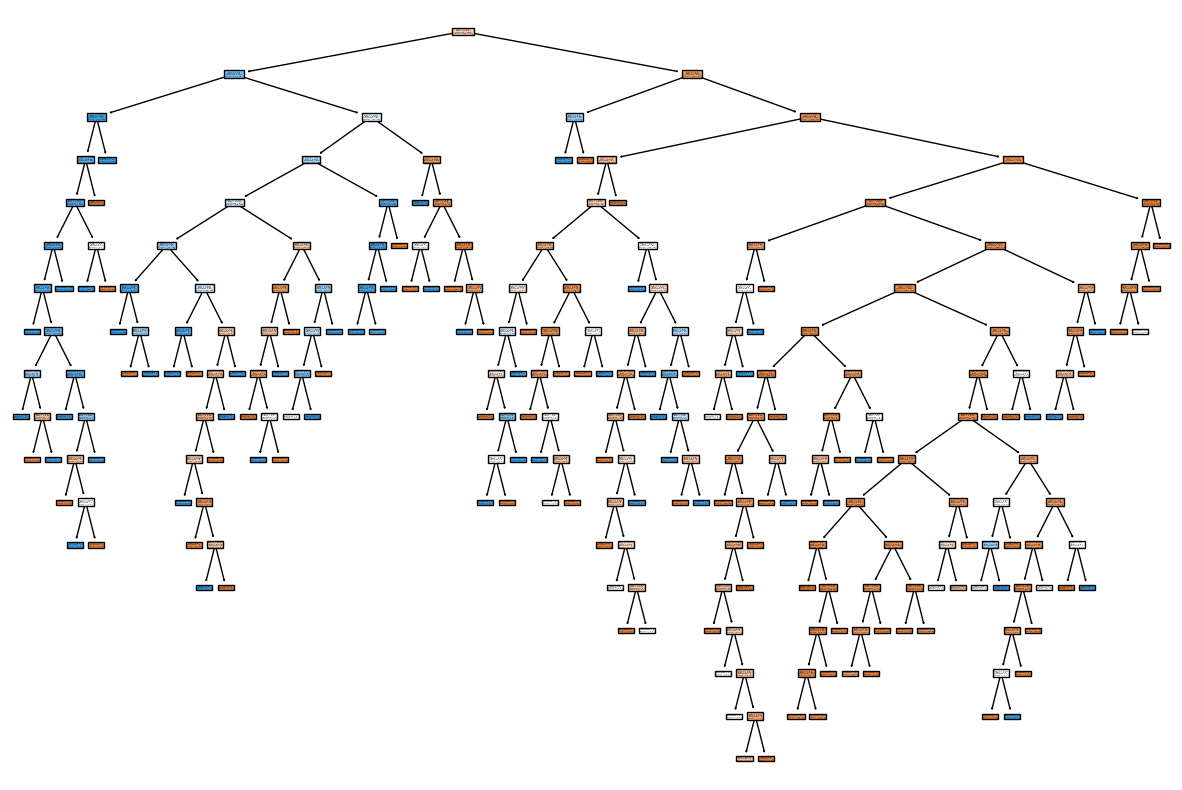

In [179]:
#plot decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(unpruned, filled=True)
plt.show();

### Pruning the Tree

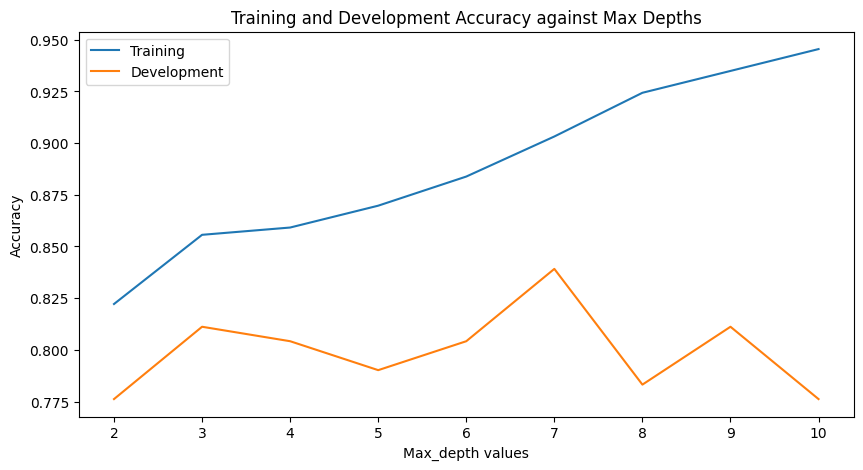

In [180]:
# looking at effect of pruning   
pruned_depths = range(2, 11)

training_scores = []
dev_scores = []
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  training_scores.append(train_score)
  dev_score = clf.score(X_dev, y_dev)
  dev_scores.append(dev_score)

plt.figure(figsize=(10,5))
plt.plot(pruned_depths, training_scores, label = 'Training' )
plt.plot(pruned_depths, dev_scores, label = 'Development' )
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
plt.title('Training and Development Accuracy against Max Depths')
plt.legend()
plt.show()

As we can see the Development line for Accuracy is showing a line that is overfitted where all the depths are plotted on the line of best fit. The Training line is showing a smooth and robust fit.

In [181]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(training_scores)]
print('Best performance reached at depth of:', best_depth)

Best performance reached at depth of: 10


In [182]:
# training model with pruning
pruned = DecisionTreeClassifier(max_depth=10, random_state=r)
pruned.fit(X_train, y_train)

# Accuracy on y_test
print("Accuracy with pruning:", pruned.score(X_test, y_test))
print("At depth:", pruned.tree_.max_depth)

Accuracy with pruning: 0.7303370786516854
At depth: 10


## Improving Decision Trees

### Training and Test Samples

In [183]:
# Create toy data
# 70% training and 30% test
X, y = make_classification(n_samples=889, n_features=8,
                           n_informative=7, n_redundant=0,
                           random_state=123, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)


Training data: (622, 8) (622,)
Test data: (267, 8) (267,)


### Decision Tree Classifier

In [184]:
# create base model
base = DecisionTreeClassifier(max_depth=None)

# fit training set to model
base.fit(X_train,y_train)

# evaluate performance
accuracy_base = base.score(X_test, y_test)
print("Accuracy base:", accuracy_base )
print("At depth:", base.tree_.max_depth)



Accuracy base: 0.8164794007490637
At depth: 17


### Bagged Ensemble

In [185]:

# create bagged ensemble model
ensemble = BaggingClassifier(base_estimator=base, n_estimators=100, random_state=7)

# fit training set to model
ensemble.fit(X_train,y_train)

# evaluate performance
accuracy_ensemble = ensemble.score(X_test, y_test)
print("Accuracy ensemble:", accuracy_ensemble)

Accuracy ensemble: 0.8876404494382022


### Random Forest Classifier

In [186]:
md = base.tree_.max_depth

# create bagged random forest model
random_forest = RandomForestClassifier(n_estimators=100, max_depth=md)

# fit training set to model
random_forest.fit(X_train,y_train)

# evaluate performance
accuracy_random_forest = random_forest.score(X_test, y_test)
print("Accuracy Random Forest:", accuracy_random_forest)

Accuracy Random Forest: 0.8801498127340824


### Adaboost Classifier 

In [187]:
# create boosted model
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=7)

# fit training set to model
adaboost_classifier.fit(X_train,y_train)

# evaluate performance
accuracy_adaboost = adaboost_classifier.score(X_test, y_test)
print("Accuracy Adaboost:", accuracy_adaboost)

Accuracy Adaboost: 0.7752808988764045


### Importance scores

The Random Forest ensemble method in sklearn allows you to print importance scores for features in the dataset.


In [188]:
forest = RandomForestClassifier(n_estimators=100, random_state=7)
forest.fit(X_train, y_train)

feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

0    0.171139
4    0.156802
5    0.136508
6    0.135360
2    0.123458
1    0.118716
3    0.099079
7    0.058938
dtype: float64

In [189]:
#Survived
df.iloc[:,0]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

At the start of improving the decision tree, we specified that this dataset has 8 features, of which  7 are informative. The classifier indeed relied on the top seven features most.

An advantage of investigating the importance of features is that irrelevant features can be removed. This removal of noise tends to improve performance and reduce training time.

In [190]:
# select important features
X = X[:, :7]


In [191]:
# retrain with 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)
print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))


Accuracy base: 0.7677902621722846
Accuracy ensemble: 0.8876404494382022


### max_depth

In [192]:
# Pruning max_depth
pruned_depths = range(2, 11)

training_scores = []
#dev_scores = []
for d in pruned_depths:
  clf = RandomForestClassifier(max_depth=d)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  training_scores.append(train_score)



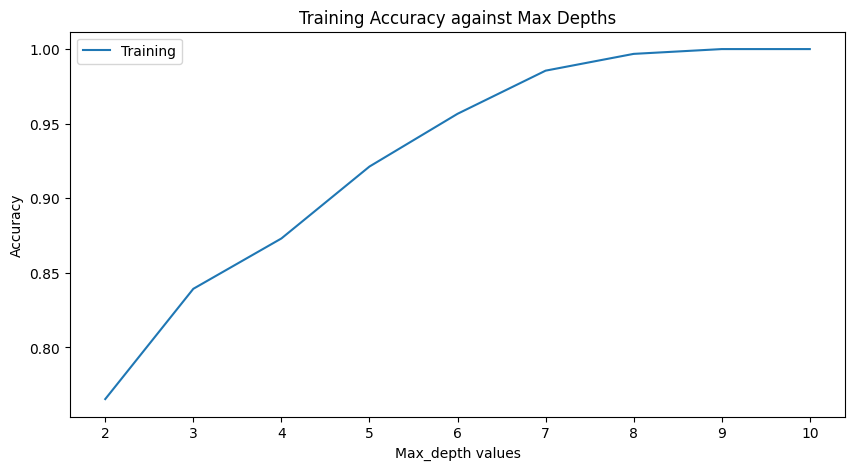

In [193]:
# create plot
plt.figure(figsize=(10,5))
plt.plot(pruned_depths, training_scores, label = 'Training' )
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
plt.title('Training Accuracy against Max Depths')
plt.legend()
plt.show()

In [195]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(training_scores)]
print('Best performance reached at depth of:', best_depth)


Best performance reached at depth of: 9


### n_estimators

In [196]:
pruned_estimators = range(1, 101)

training_scores = []
for e in pruned_estimators:
  clf = RandomForestClassifier(n_estimators=e)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  training_scores.append(train_score)



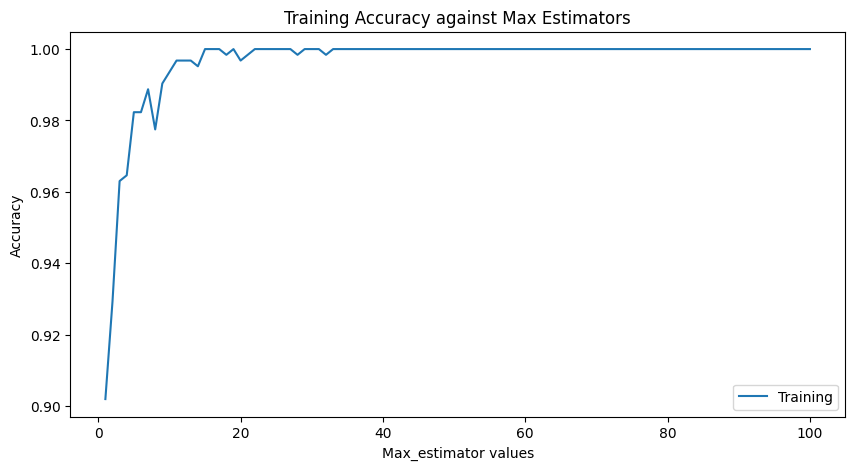

In [197]:
# create plot
plt.figure(figsize=(10,5))
plt.plot(pruned_estimators, training_scores, label = 'Training' )
plt.xlabel("Max_estimator values")
plt.ylabel("Accuracy")
plt.title('Training Accuracy against Max Estimators')
plt.legend()
plt.show()

In [198]:
# fitting the chosen tree
best_estimator = pruned_estimators[np.argmax(training_scores)]
print('Best performance reached when number of estimators is:', best_estimator)



Best performance reached when number of estimators is: 15


In [199]:
# training model with pruning
pruned = RandomForestClassifier(max_depth=best_depth, n_estimators=best_estimator)
pruned.fit(X, y)

# Accuracy
pruned_random_forest_accuracy = pruned.score(X_test, y_test)
print("Accuracy with Random Forest:", pruned_random_forest_accuracy)
print(f"At depth: {pruned.max_depth} with number of estimators: {pruned.n_estimators}")


Accuracy with Random Forest: 0.9850187265917603
At depth: 9 with number of estimators: 15


### Accuracy report for all models

In [200]:
# base model
print("Accuracy base:", accuracy_base)

# ensemble
print("Accuracy ensemble:", accuracy_ensemble)

# random forest
print("Accuracy Random Forest:", accuracy_random_forest)

# pruned Random Forest
print("Accuracy pruned Random Forest:", pruned_random_forest_accuracy)

# adaboost
print("Accuracy Adaboost:", accuracy_adaboost)

Accuracy base: 0.8164794007490637
Accuracy ensemble: 0.8876404494382022
Accuracy Random Forest: 0.8801498127340824
Accuracy pruned Random Forest: 0.9850187265917603
Accuracy Adaboost: 0.7752808988764045


### Best Accuracy (Pruned Random Forest)

In [201]:
# Accuracy with best depth and best n_estimators
print("Best Accuracy with pruned Random Forest:", pruned.score(X_test, y_test))
print(f"At depth: {pruned.max_depth} and number of estimators: {pruned.n_estimators}")

Best Accuracy with pruned Random Forest: 0.9850187265917603
At depth: 9 and number of estimators: 15
